# Проект 3. О вкусной и здоровой пище

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # инструмент для создания и обучения модели
from sklearn import metrics  # инструменты для оценки точности модели

pd.set_option('display.max_rows', 20)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [32]:
df = pd.read_csv("../input/TripAdvisor/main_task.csv")
df_copy = df.copy()

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

Restaurant_id — идентификационный номер ресторана / сети ресторанов;

City — город, в котором находится ресторан;

Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;

Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

Price Range — диапазон цен в ресторане;

Number of Reviews — количество отзывов о ресторане;

Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;

URL_TA — URL страницы ресторана на TripAdvosor;

ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [34]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [35]:
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

In [36]:
for i in df.columns:
    print(i, type(df[i][0]))

Restaurant_id <class 'str'>
City <class 'str'>
Cuisine Style <class 'str'>
Ranking <class 'numpy.float64'>
Rating <class 'numpy.float64'>
Price Range <class 'str'>
Number of Reviews <class 'numpy.float64'>
Reviews <class 'str'>
URL_TA <class 'str'>
ID_TA <class 'str'>


In [37]:
RANDOM_SEED = 42


def estimMAE(df):
    df_t = df.drop(
        ['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'],
        axis=1,
        inplace=False)
    #     df_t.fillna(value=0, inplace=True)
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    X = df_t.drop(['Restaurant_id', 'Rating'], axis=1)
    y = df_t['Rating']
    print(X.columns)
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [46]:
def parseRev(x, i, j):
    if len(x) > i:
        y = x[i]
        if len(y) > j:
            return y[j]
    return np.NaN

## Добавление новых признаков

### Reviews

In [52]:
# df_rev = df['Reviews'].str.replace(", nan]",", 'nan']").str.replace("\[nan,","['nan',").apply(ast.literal_eval)
df["Reviews"].fillna("[[], []]", inplace=True)
df_rev = df['Reviews'].str.replace("nan", "' '").apply(ast.literal_eval)

In [53]:
df['Reviews_date1'] = pd.to_datetime(df_rev.apply(parseRev, i=1, j=0))
df['Reviews_date2'] = pd.to_datetime(df_rev.apply(parseRev, i=1, j=1))

In [54]:
df['Reviews_deltaTime'] = (df.Reviews_date1 - df.Reviews_date2).dt.days
Reviews_dateMax = pd.Series([df.Reviews_date1.max(),
                             df.Reviews_date2.max()]).max()
df['Reviews_deltaTimeFromMax1'] = (Reviews_dateMax - df.Reviews_date1).dt.days
df['Reviews_deltaTimeFromMax1'] = (Reviews_dateMax - df.Reviews_date2).dt.days

In [55]:
df['Reviews_date1_Y'] = df.Reviews_date1.dt.year
df['Reviews_date1_M'] = df.Reviews_date1.dt.month
df['Reviews_date1_DW'] = df.Reviews_date1.dt.dayofweek

In [56]:
# df['Reviews_date1_Y'].hist()
# df = pd.get_dummies(df, columns=[ 'Reviews_date1_M',], dummy_na=True)
# df['Reviews_date1_M'].hist()
df = pd.get_dummies(df, columns=[
    'Reviews_date1_DW',
], dummy_na=True)
# df['Reviews_date1_DW'].hist()

In [57]:
# df['Reviews_date1'].hist()
# df['Reviews_date2'].hist()

In [58]:
# df['Reviews_deltaTimeFromMax1'].hist()
# df['Reviews_deltaTime'].hist()

In [59]:
# df['Reviews_date1_Y'].hist()

In [60]:
# df['Reviews_date1_M'].hist()

In [61]:
# df['Reviews_date1_DW'].hist()

In [62]:
# fil = df.Reviews_date1 < pd.to_datetime('2012-01-01')
# df[fil]

In [63]:
# round(df.Reviews_deltaTime.mean())
# fil = df.Reviews_deltaTime > 3000
# df[fil]

#### Reviews_text1

In [64]:
df['Reviews_text1'] = df_rev.apply(parseRev, i=0, j=0)
df['Reviews_text2'] = df_rev.apply(parseRev, i=0, j=1)
# df['ReviewsTexts'] = df['Reviews_text1'] + " " + df['Reviews_text2']
# df['ReviewsTexts'].fillna('', inplace=True)
df['ReviewsTexts'] = df['Reviews_text1'].fillna(
    '') + " " + df['Reviews_text2'].fillna('')
# df['ReviewsTexts'].fillna('', inplace=True)
df['ReviewsTexts'] = df['ReviewsTexts'].str.lower().str.split(' ')

In [65]:
# df['ReviewsTexts']

### Price Range

In [66]:
df['Price Range'].unique()
df['Price Range'].value_counts(dropna=False)
priceMap = {'$$ - $$$': 2, '$$$$': 3, '$': 1}
df['PriceRange'] = df['Price Range'].map(priceMap)
# df

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

$$ - $$$    18412
NaN         13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

### Cuisine Style

In [67]:
df['Cuisine Style'].fillna("['Blank Style']", inplace=True)
df['Cuisine Style'] = df['Cuisine Style'].apply(ast.literal_eval)

In [68]:
df['NumberCuisneStyle'] = df['Cuisine Style'].apply(lambda x: len(x))
# df['NumberCuisneStyle'] = df['Cuisine Style'].apply(lambda x: len(x) if len(x)>0 else 1)
# df.NumberCuisneStyle.hist()
# df.NumberCuisneStyle

## Заполнение пропусков

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Restaurant_id              40000 non-null  object        
 1   City                       40000 non-null  object        
 2   Cuisine Style              40000 non-null  object        
 3   Ranking                    40000 non-null  float64       
 4   Rating                     40000 non-null  float64       
 5   Price Range                26114 non-null  object        
 6   Number of Reviews          37457 non-null  float64       
 7   Reviews                    40000 non-null  object        
 8   URL_TA                     40000 non-null  object        
 9   ID_TA                      40000 non-null  object        
 10  Reviews_date1              33529 non-null  datetime64[ns]
 11  Reviews_date2              28973 non-null  datetime64[ns]
 12  Revi

### Reviews

In [70]:
df.Reviews_deltaTime.fillna(round(df.Reviews_deltaTime.mean()), inplace=True)
df.Reviews_deltaTimeFromMax1.fillna(round(df.Reviews_deltaTimeFromMax1.mean()),
                                    inplace=True)

In [71]:
df['Reviews_date1_Y'].fillna(round(df.Reviews_date1_Y.mean()), inplace=True)
df['Reviews_date1_M'].fillna(round(df.Reviews_date1_M.mean()), inplace=True)
# df['Reviews_date1_DW'].fillna(round(df.Reviews_date1_DW.mean()), inplace=True)

### Price Range

In [72]:
df.PriceRange.fillna(2, inplace=True)

### Number of Reviews

In [73]:
# df['Number of Reviews'].hist()
# df['Number of Reviews'].mean()

In [74]:
df['NumberOfReviews'] = df['Number of Reviews'].fillna(
    round(df['Number of Reviews'].mean()))

### Cuisine Style

In [75]:
# df['Cuisine Style'].fillna("['Blank Style']", inplace=True)

df['Cuisine Style'].value_counts().head(2)
df['Cuisine Style'].isna().sum()

[Blank Style]    9283
[Italian]        1032
Name: Cuisine Style, dtype: int64

0

In [76]:
import itertools, collections

chain = itertools.chain.from_iterable(df['Cuisine Style'])
counter = collections.Counter(chain)
cStyle = sorted(counter.keys())
# len(counter)
styles = counter.most_common(15)
styles = pd.Series(styles).apply(lambda x: x[0])
type(styles)
# cStyle

for c in styles:
    df['Style_' + c] = df['Cuisine Style'].apply(lambda x: int(c in x))

pandas.core.series.Series

In [77]:
revW = [
    'good',
    'great',
    'nice',
    'very',
    'service',
    'best',
    'excellent',
    'but',
    'not',
    'delicious',
    'lovely',
    'friendly',
    'amazing',
    'tasty',
    'little',
    'atmosphere',
    'local',
    'staff',
    'experience',
    'value',
    'average',
    'authentic',
    'fantastic',
    'quick',
]

In [78]:
import itertools, collections

chain = itertools.chain.from_iterable(df['ReviewsTexts'])
counter = collections.Counter(chain)
cStyle = sorted(counter.keys())
# len(counter)
styles = counter.most_common(100)
styles = pd.Series(styles).apply(lambda x: x[0])
# list(styles[:50])
type(styles)
# cStyle

for c in revW:
    df['rev_' + c] = df['ReviewsTexts'].apply(lambda x: int(c in x))

pandas.core.series.Series

In [79]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Reviews_date1,Reviews_date2,Reviews_deltaTime,Reviews_deltaTimeFromMax1,Reviews_date1_Y,Reviews_date1_M,Reviews_date1_DW_0.0,Reviews_date1_DW_1.0,Reviews_date1_DW_2.0,Reviews_date1_DW_3.0,Reviews_date1_DW_4.0,Reviews_date1_DW_5.0,Reviews_date1_DW_6.0,Reviews_date1_DW_nan,Reviews_text1,...,Style_Fast Food,rev_good,rev_great,rev_nice,rev_very,rev_service,rev_best,rev_excellent,rev_but,rev_not,rev_delicious,rev_lovely,rev_friendly,rev_amazing,rev_tasty,rev_little,rev_atmosphere,rev_local,rev_staff,rev_experience,rev_value,rev_average,rev_authentic,rev_fantastic,rev_quick
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2017-12-31,2017-11-20,41.0,98.0,2017.0,12.0,0,0,0,0,0,0,1,0,Good food at your doorstep,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,[Blank Style],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2017-07-06,2016-06-19,382.0,617.0,2017.0,7.0,0,0,0,1,0,0,0,0,Unique cuisine,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2018-01-08,2018-01-06,2.0,51.0,2018.0,1.0,1,0,0,0,0,0,0,0,Catch up with friends,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,[Blank Style],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaT,NaT,124.0,366.0,2017.0,7.0,0,0,0,0,0,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2017-11-18,2017-02-19,272.0,372.0,2017.0,11.0,0,0,0,0,0,1,0,0,Best place to try a Bavarian food,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,2017-12-16,2017-11-12,34.0,106.0,2017.0,12.0,0,0,0,0,0,1,0,0,The real Italian experience!,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2017-12-21,2017-12-12,9.0,76.0,2017.0,12.0,0,0,0,1,0,0,0,0,Parisian atmosphere,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2016-11-03,2008-04-12,3127.0,3607.0,2016.0,11.0,0,0,0,1,0,0,0,0,Good by swedish standards,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,2017-07-11,2017-06-18,23.0,253.0,2017.0,7.0,0,1,0,0,0,0,0,0,Underground restaurant,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### NumberCuisneStylvalue_counts

In [80]:
cSMean = round(df.NumberCuisneStyle.mean())
# cSMean
# cSMean = 3
df.NumberCuisneStyle = df.NumberCuisneStyle.apply(lambda x: x
                                                  if x > 0 else cSMean)

3

## Анализ

#### Ranking

In [81]:
# # посмотрим на топ 10 городов
# for x in (df['City'].value_counts())[0:3].index:
#     df['Ranking'][df['City'] == x].hist(bins=100)
# plt.show()

In [82]:
cr = df.groupby('City')['Ranking'].max()
df['RankingN'] = df['Ranking'] / df['City'].apply(lambda x: cr[x])

In [83]:
# for x in (df['City'].value_counts())[:3].index:
#     df['RankingN'][df['City'] == x].hist(bins=100)
# plt.show()

In [84]:
# df['RankingN'].hist(bins=100)

#### NumberOfReviews

In [85]:
# # посмотрим на топ 10 городов
# for x in (df['City'].value_counts())[0:1].index:
#     df['NumberOfReviews'][df['City'] == x].hist(bins=100)
# plt.show()

In [86]:
# cr = df.groupby('City')['NumberOfReviews'].max()
# df['NumberOfReviewsN'] = df['NumberOfReviews'] / df['City'].apply(lambda x: cr[x])

In [87]:
# # посмотрим на топ 10 городов
# for x in (df['City'].value_counts())[2:4].index:
#     df['NumberOfReviewsN'][df['City'] == x].hist(bins=100)
# plt.show()

In [88]:
# for x in (df['City'].value_counts())[:3].index:
#     df['NumberOfReviewsN'][df['City'] == x].hist(bins=100)
# plt.show()

## Добавление новых признаков из комбинаций новых

### City

In [89]:
citycopy = df.City
df = pd.get_dummies(df, columns=[
    'City',
], dummy_na=True)
df['City'] = citycopy

### product*

In [90]:
# df['ProdCR'] = df.PriceRange * df.NumberCuisneStyle

In [91]:
df.isna().sum()
df

Restaurant_id        0
Cuisine Style        0
Ranking              0
Rating               0
Price Range      13886
                 ...  
City_Vienna          0
City_Warsaw          0
City_Zurich          0
City_nan             0
City                 0
Length: 102, dtype: int64

,Restaurant_id,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Reviews_date1,Reviews_date2,Reviews_deltaTime,Reviews_deltaTimeFromMax1,Reviews_date1_Y,Reviews_date1_M,Reviews_date1_DW_0.0,Reviews_date1_DW_1.0,Reviews_date1_DW_2.0,Reviews_date1_DW_3.0,Reviews_date1_DW_4.0,Reviews_date1_DW_5.0,Reviews_date1_DW_6.0,Reviews_date1_DW_nan,Reviews_text1,Reviews_text2,...,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,City
0,id_5569,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2017-12-31,2017-11-20,41.0,98.0,2017.0,12.0,0,0,0,0,0,0,1,0,Good food at your doorstep,A good hotel restaurant,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Paris
1,id_1535,[Blank Style],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,2017-07-06,2016-06-19,382.0,617.0,2017.0,7.0,0,0,0,1,0,0,0,0,Unique cuisine,Delicious Nepalese food,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Stockholm
2,id_352,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2018-01-08,2018-01-06,2.0,51.0,2018.0,1.0,1,0,0,0,0,0,0,0,Catch up with friends,Not exceptional,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,London
3,id_3456,[Blank Style],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaT,NaT,124.0,366.0,2017.0,7.0,0,0,0,0,0,0,0,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Berlin
4,id_615,"[German, Central European, Vegetarian Friendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2017-11-18,2017-02-19,272.0,372.0,2017.0,11.0,0,0,0,0,0,1,0,0,Best place to try a Bavarian food,Nice building but improvements need to be...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,2017-12-16,2017-11-12,34.0,106.0,2017.0,12.0,0,0,0,0,0,1,0,0,The real Italian experience!,"Wonderful food, wonderful experience",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Milan
39996,id_6340,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2017-12-21,2017-12-12,9.0,76.0,2017.0,12.0,0,0,0,1,0,0,0,0,Parisian atmosphere,Bit pricey but interesting decor and good...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Paris
39997,id_1649,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2016-11-03,2008-04-12,3127.0,3607.0,2016.0,11.0,0,0,0,1,0,0,0,0,Good by swedish standards,A hidden jewel in the middle of Västertorp...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Stockholm
39998,id_640,"[Polish, European, Eastern European, Central E...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,2017-07-11,2017-06-18,23.0,253.0,2017.0,7.0,0,1,0,0,0,0,0,0,Underground restaurant,Oldest Restaurant in Warsaw,...,0,0,0,0,0

## Удаление столбцов

In [92]:
df.drop([
    'Reviews_date1', 'Reviews_date2', 'Number of Reviews', 'Reviews_text1',
    'Reviews_text2', 'ReviewsTexts'
],
        axis=1,
        inplace=True)

## Оценка

In [93]:
estimMAE(df)

Index(['Ranking', 'Reviews_deltaTime', 'Reviews_deltaTimeFromMax1',
       'Reviews_date1_Y', 'Reviews_date1_M', 'Reviews_date1_DW_0.0',
       'Reviews_date1_DW_1.0', 'Reviews_date1_DW_2.0', 'Reviews_date1_DW_3.0',
       'Reviews_date1_DW_4.0', 'Reviews_date1_DW_5.0', 'Reviews_date1_DW_6.0',
       'Reviews_date1_DW_nan', 'PriceRange', 'NumberCuisneStyle',
       'NumberOfReviews', 'Style_Vegetarian Friendly', 'Style_European',
       'Style_Blank Style', 'Style_Mediterranean', 'Style_Italian',
       'Style_Vegan Options', 'Style_Gluten Free Options', 'Style_Bar',
       'Style_French', 'Style_Asian', 'Style_Pizza', 'Style_Spanish',
       'Style_Pub', 'Style_Cafe', 'Style_Fast Food', 'rev_good', 'rev_great',
       'rev_nice', 'rev_very', 'rev_service', 'rev_best', 'rev_excellent',
       'rev_but', 'rev_not', 'rev_delicious', 'rev_lovely', 'rev_friendly',
       'rev_amazing', 'rev_tasty', 'rev_little', 'rev_atmosphere', 'rev_local',
       'rev_staff', 'rev_experience', 'rev_valu

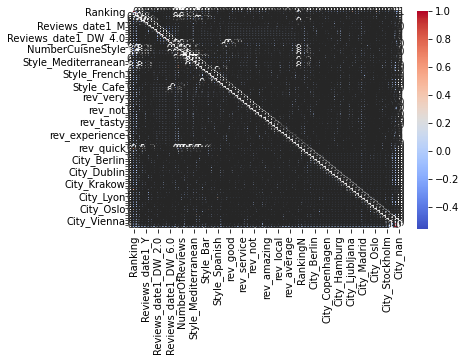

In [94]:
correlation = df.corr()
# correlation
sns.heatmap(correlation, annot=True, fmt='.1f', cmap='coolwarm')